<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

In [4]:
pip install pycaret

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import xgboost as xgb
from  sklearn.model_selection import cross_val_score
from sklearn.metrics import *

from pycaret.regression import *
from pycaret.datasets import get_data

## Load and Prepare Data

In [4]:
covid=pd.read_csv("country_vaccinations.csv")
covid.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

## EDA

In [8]:
covid.describe()

total_vaccinations  people_vaccinated  people_fully_vaccinated  \
count        1.745100e+04       1.655400e+04             1.379500e+04   
mean         1.200444e+07       5.704551e+06             3.293973e+06   
std          6.622349e+07       2.101612e+07             1.234425e+07   
min          0.000000e+00       0.000000e+00             1.000000e+00   
25%          1.262015e+05       9.999100e+04             4.832450e+04   
50%          8.890780e+05       6.450395e+05             3.632100e+05   
75%          4.213660e+06       2.809300e+06             1.635366e+06   
max          1.426347e+09       6.220000e+08             2.232990e+08   

       daily_vaccinations_raw  daily_vaccinations  \
count            1.442100e+04        3.094800e+04   
mean             2.273661e+05        1.149718e+05   
std              1.258556e+06        8.460548e+05   
min              0.000000e+00        0.000000e+00   
25%              4.324000e+03        8.520000e+02   
50%              2.133600e+04        6.471000e+03   
75%              9.441700e+04        3.545425e+04   
max              2.474100e+07        2.242429e+07   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
count                    17451.000000                   16554.000000   
mean                        29.283554                      19.181574   
std                         35.042304                      20.734193   
min                          0.000000                       0.000000   
25%                          2.970000                       2.580000   
50%                         14.510000                      10.730000   
75%                         44.460000                      30.890000   
max                        232.350000                     116.660000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  
count                         13795.000000                    30948.000000  
mean                             12.340698                     3426.365969  
std                              15.857682                     4572.377684  
min                               0.000000                        0.000000  
25%                               1.320000                      412.000000  
50%                               5.560000                     1851.000000  
75%                              17.610000                     5123.000000  
max                             115.690000                   118759.000000

In [9]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

## Data Preprocessing

In [10]:
covid.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

# **یک نکته قابل تامل در اینجا این میباشد که ما یک کپی از فایل اصلی میگیریم برای استفاده در بعضی قسمت هایی که پوچ هستند یک جایگزینی انجام دهیم**




In [11]:
covid_fill=covid

In [12]:
covid_fill.fillna(covid_fill.mean(),inplace=True)

In [13]:
print(covid_fill.isnull().sum())


country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64


In [14]:
le=LabelEncoder()
covid['country']=le.fit_transform(covid['country'])


In [15]:
le=LabelEncoder()
covid['iso_code']=le.fit_transform(covid['iso_code'])

In [16]:
le=LabelEncoder()
covid['vaccines']=le.fit_transform(covid['vaccines'])

In [17]:
le=LabelEncoder()
covid['source_name']=le.fit_transform(covid['source_name'])

In [18]:
le=LabelEncoder()
covid['source_website']=le.fit_transform(covid['source_website'])

In [19]:
covid['date']=covid['date'].str.replace('-',' ')
covid

country  iso_code        date  total_vaccinations  people_vaccinated  \
0            0         1  2021 02 22        0.000000e+00       0.000000e+00   
1            0         1  2021 02 23        1.200444e+07       5.704551e+06   
2            0         1  2021 02 24        1.200444e+07       5.704551e+06   
3            0         1  2021 02 25        1.200444e+07       5.704551e+06   
4            0         1  2021 02 26        1.200444e+07       5.704551e+06   
...        ...       ...         ...                 ...                ...   
31235      217       217  2021 07 11        1.491397e+06       8.959800e+05   
31236      217       217  2021 07 12        1.531868e+06       9.263120e+05   
31237      217       217  2021 07 13        1.575539e+06       9.556560e+05   
31238      217       217  2021 07 14        1.613640e+06       9.887460e+05   
31239      217       217  2021 07 15        1.666862e+06       1.036252e+06   

       people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                 3.293973e+06           227366.073989       114971.789486   
1                 3.293973e+06           227366.073989         1367.000000   
2                 3.293973e+06           227366.073989         1367.000000   
3                 3.293973e+06           227366.073989         1367.000000   
4                 3.293973e+06           227366.073989         1367.000000   
...                        ...                     ...                 ...   
31235             5.954170e+05           227366.073989        18598.000000   
31236             6.055560e+05            40471.000000        23205.000000   
31237             6.198830e+05            43671.000000        27567.000000   
31238             6.248940e+05            38101.000000        30698.000000   
31239             6.306100e+05            53222.000000        33326.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           29.283554                      19.181574   
2                           29.283554                      19.181574   
3                           29.283554                      19.181574   
4                           29.283554                      19.181574   
...                               ...                            ...   
31235                       10.030000                       6.030000   
31236                       10.310000                       6.230000   
31237                       10.600000                       6.430000   
31238                       10.860000                       6.650000   
31239                       11.210000                       6.970000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                12.340698                     3426.365969   
1                                12.340698                       35.000000   
2                                12.340698                       35.000000   
3                                12.340698                       35.000000   
4                                12.340698                       35.000000   
...                                    ...                             ...   
31235                             4.010000                     1251.000000   
31236                             4.070000                     1561.000000   
31237                             4.170000                     1855.000000   
31238                             4.200000                     2065.000000   
31239                             4.240000                     2242.000000   

       vaccines  source_name  source_website  
0            17           91              28  
1            17           91              28  
2            17           91              28  
3            17           91              28  
4            17           91              28  
...         ...          ...         

## Strorytelling - Visualization

In [19]:
###ما در اینجا با پیر پلات رابطه بین فیچر هامون در میاریم که بسیار کاربردی###

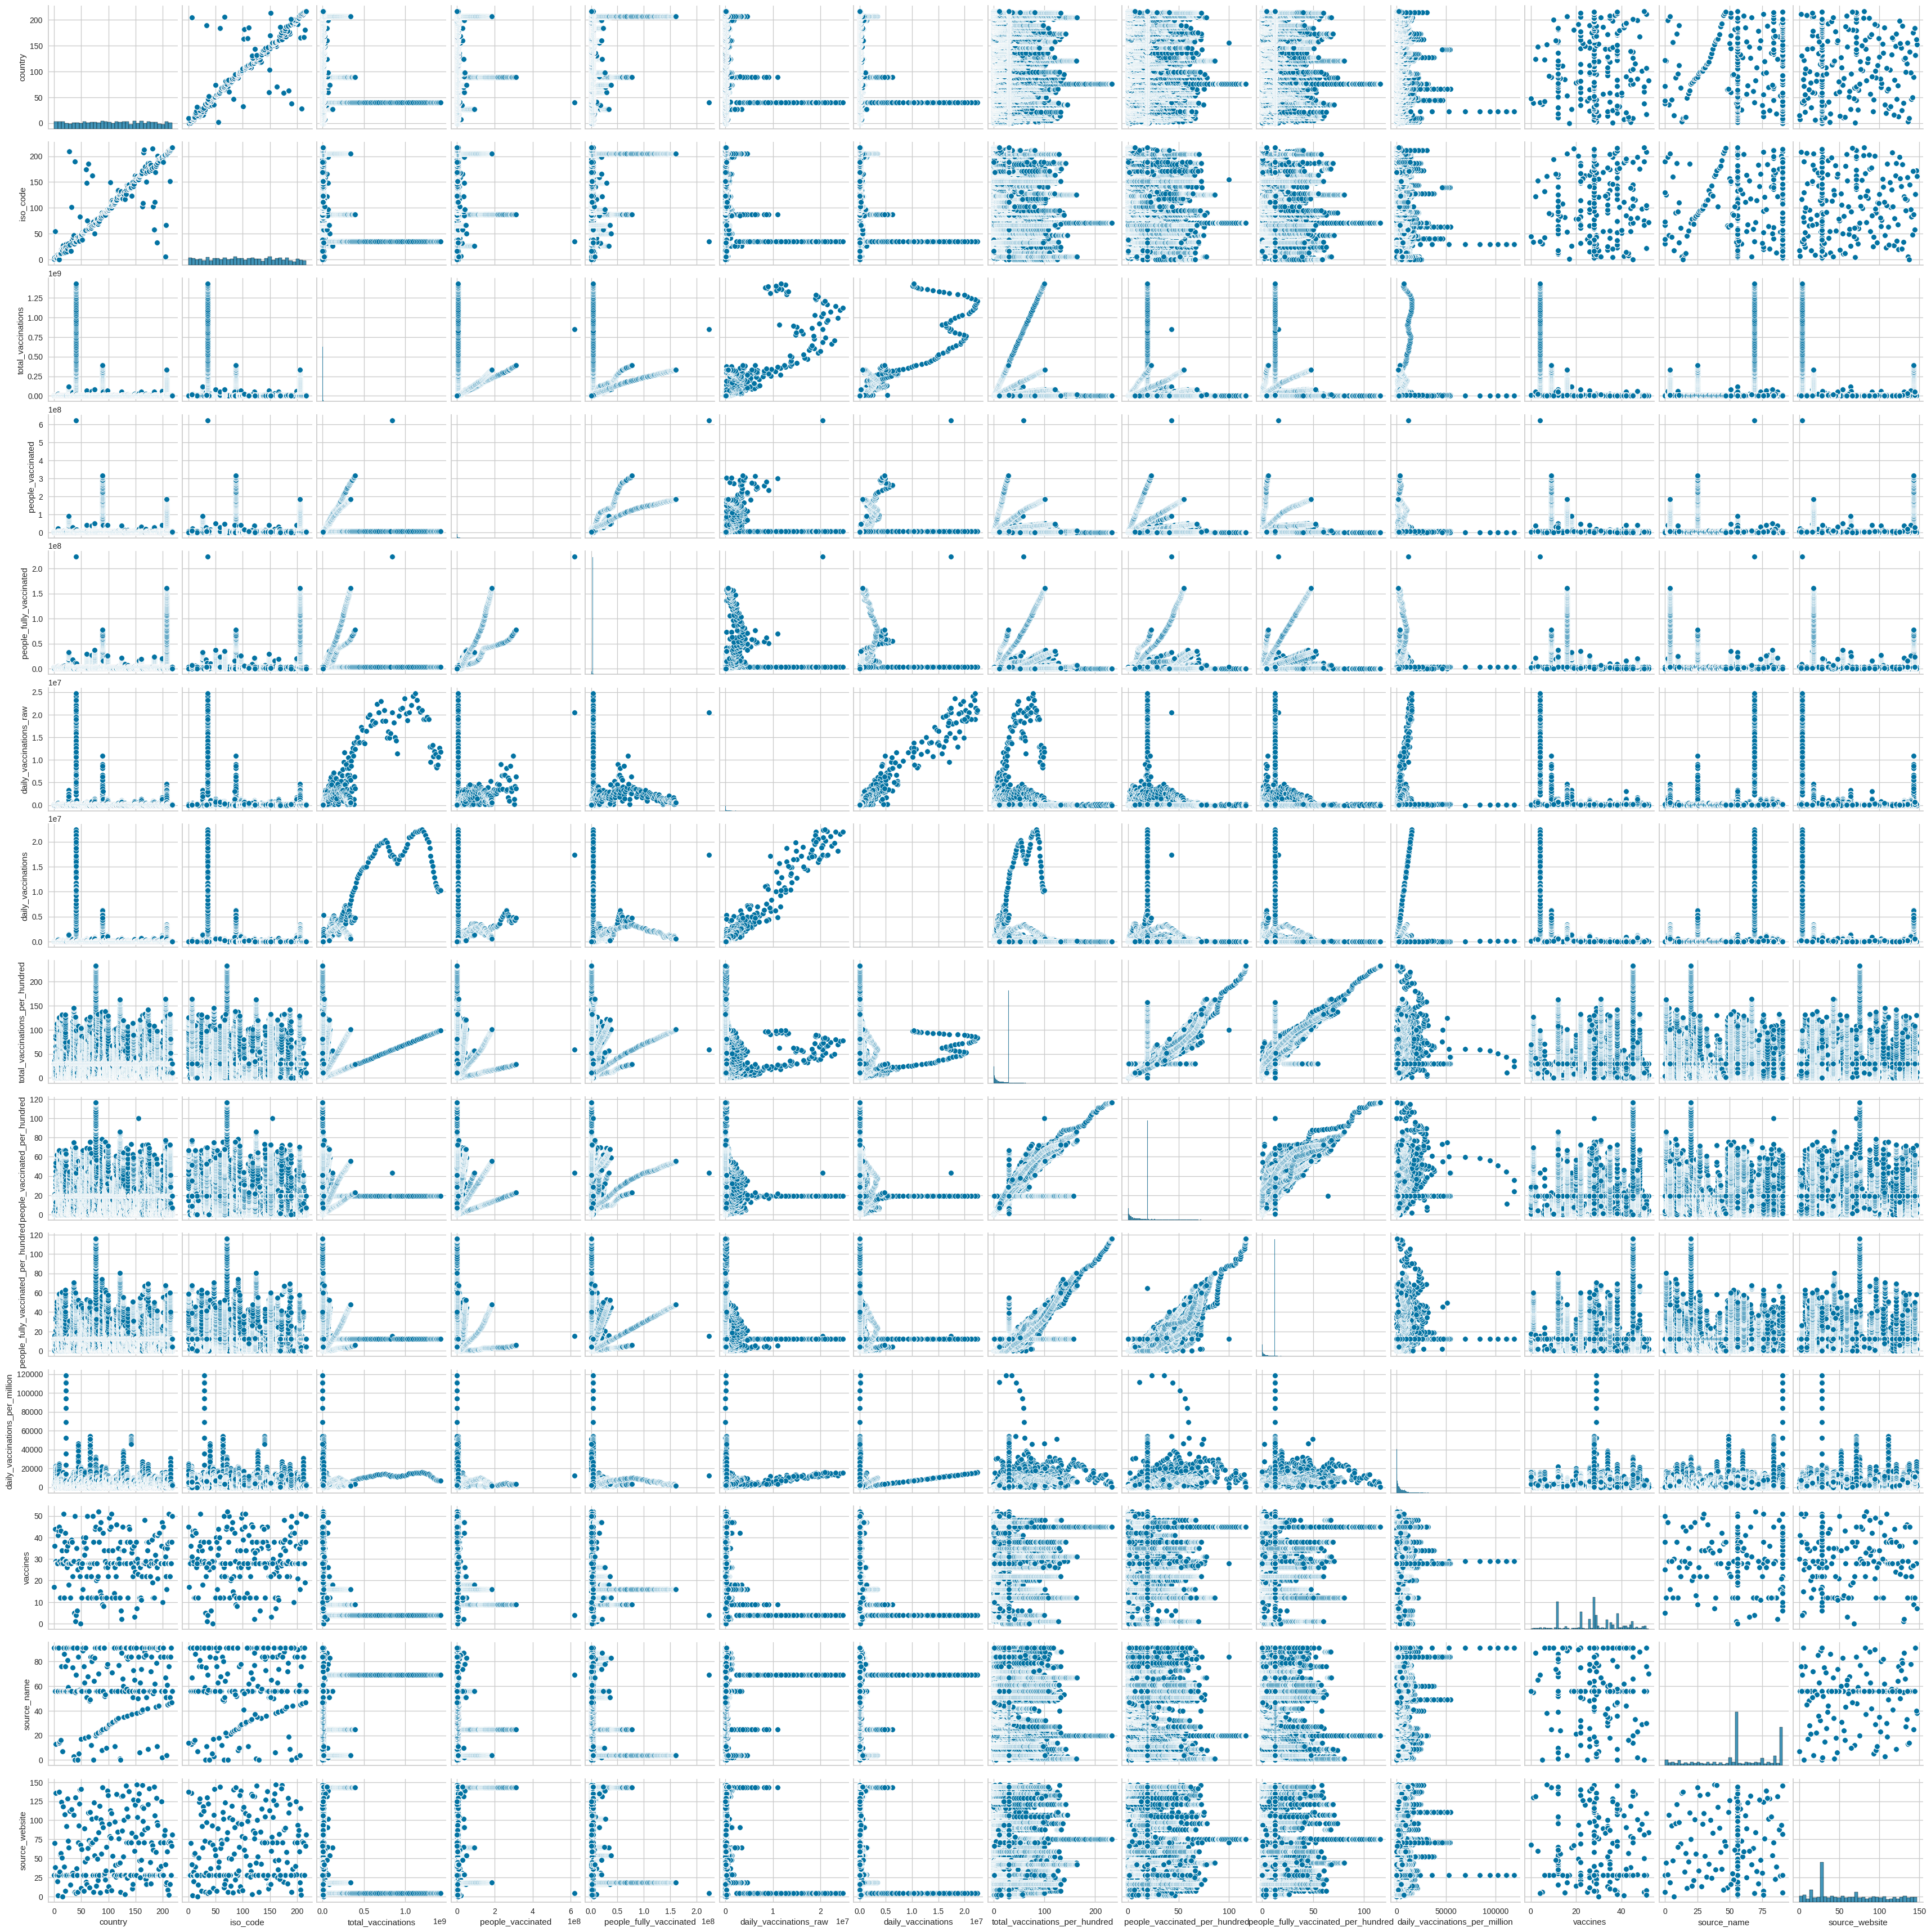

In [20]:
sns.pairplot(covid)

<ipython-input-21-76a19f6ac33d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=covid.corr()


<Axes: >

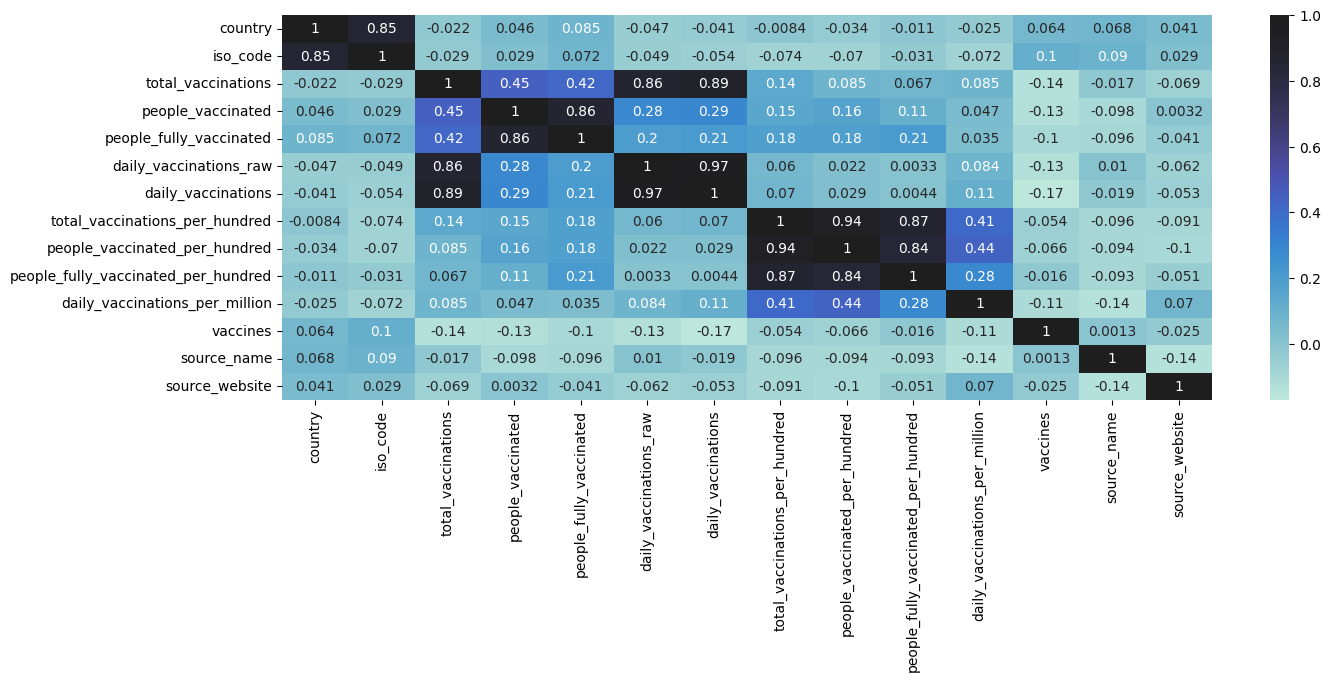

In [21]:
corr=covid.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,center=1,annot=True)

## Prepare Data for Machine learning

<Axes: xlabel='total_vaccinations', ylabel='daily_vaccinations'>

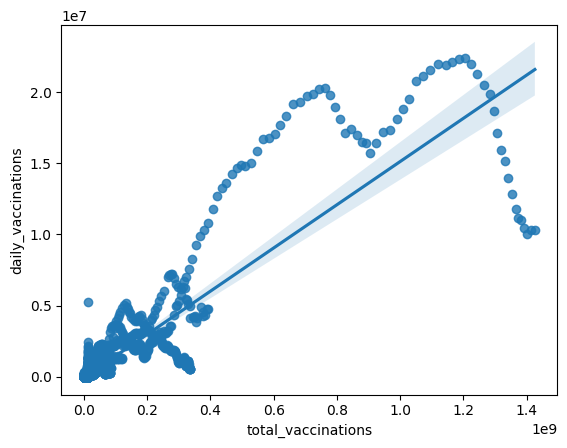

In [22]:
sns.regplot(x="total_vaccinations",y="daily_vaccinations",data=covid)

<Axes: xlabel='total_vaccinations', ylabel='daily_vaccinations_raw'>

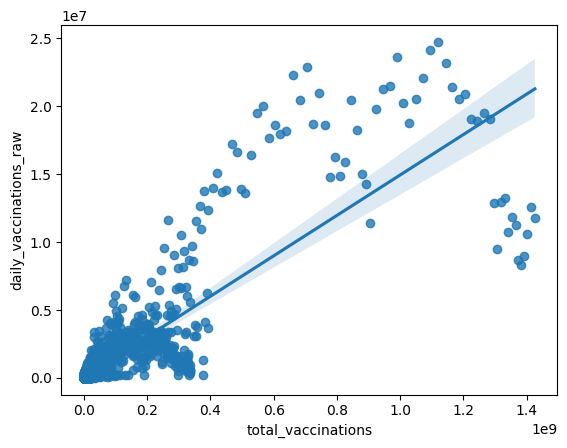

In [23]:
sns.regplot(y="daily_vaccinations_raw",x="total_vaccinations",data=covid)

## Train your model

In [22]:
x=covid[['country', 'iso_code','people_vaccinated',
       'people_fully_vaccinated','daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website']]
x

country  iso_code  people_vaccinated  people_fully_vaccinated  \
0            0         1       0.000000e+00             3.293973e+06   
1            0         1       5.704551e+06             3.293973e+06   
2            0         1       5.704551e+06             3.293973e+06   
3            0         1       5.704551e+06             3.293973e+06   
4            0         1       5.704551e+06             3.293973e+06   
...        ...       ...                ...                      ...   
31235      217       217       8.959800e+05             5.954170e+05   
31236      217       217       9.263120e+05             6.055560e+05   
31237      217       217       9.556560e+05             6.198830e+05   
31238      217       217       9.887460e+05             6.248940e+05   
31239      217       217       1.036252e+06             6.306100e+05   

       daily_vaccinations_raw  daily_vaccinations  \
0               227366.073989       114971.789486   
1               227366.073989         1367.000000   
2               227366.073989         1367.000000   
3               227366.073989         1367.000000   
4               227366.073989         1367.000000   
...                       ...                 ...   
31235           227366.073989        18598.000000   
31236            40471.000000        23205.000000   
31237            43671.000000        27567.000000   
31238            38101.000000        30698.000000   
31239            53222.000000        33326.000000   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                            0.000000                       0.000000   
1                           29.283554                      19.181574   
2                           29.283554                      19.181574   
3                           29.283554                      19.181574   
4                           29.283554                      19.181574   
...                               ...                            ...   
31235                       10.030000                       6.030000   
31236                       10.310000                       6.230000   
31237                       10.600000                       6.430000   
31238                       10.860000                       6.650000   
31239                       11.210000                       6.970000   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                12.340698                     3426.365969   
1                                12.340698                       35.000000   
2                                12.340698                       35.000000   
3                                12.340698                       35.000000   
4                                12.340698                       35.000000   
...                                    ...                             ...   
31235                             4.010000                     1251.000000   
31236                             4.070000                     1561.000000   
31237                             4.170000                     1855.000000   
31238                             4.200000                     2065.000000   
31239                             4.240000                     2242.000000   

       vaccines  source_name  source_website  
0            17           91              28  
1            17           91              28  
2            17           91              28  
3            17           91              28  
4            17           91              28  
...         ...          ...             ...  
31235        50           56              81  
31236        50           56              81  
31237        50           56              81  
31238        50           56              81  
31239        50           56              81  

[31240 rows x 13 columns]

In [23]:
y=covid['total_vaccinations']
y

0        0.000000e+00
1        1.200444e+07
2        1.200444e+07
3        1.200444e+07
4        1.200444e+07
             ...     
31235    1.491397e+06
31236    1.531868e+06
31237    1.575539e+06
31238    1.613640e+06
31239    1.666862e+06
Name: total_vaccinations, Length: 31240, dtype: float64

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12)

In [60]:
###طبق تحقیقات انجام شده دوتا کلاس ،بهترین ها برای این مسئله میباشندxgb,svm ###

In [25]:
reg_xgb= xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.08,
    subsample=0.75,
    colsample_bytree=1,
    max_depth=7,
    gamma=0,
)
reg_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [26]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [35]:
###در اینجا کشور هارو بر اساس واکسن هایی که زدن تعدادشون میشماریم###

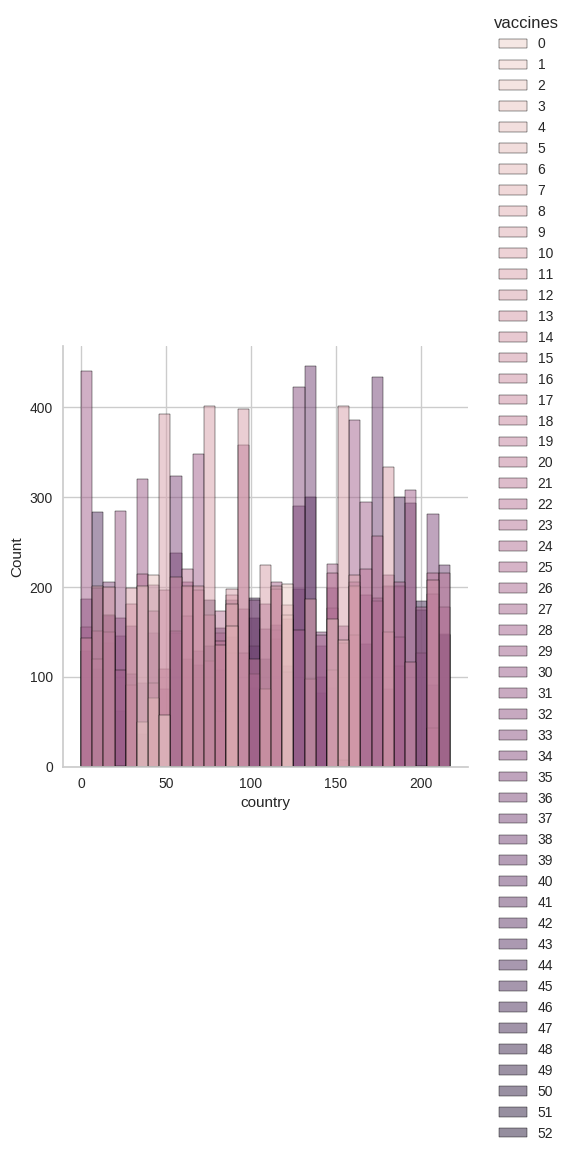

In [27]:
sns.displot(covid,x="country",hue="vaccines",common_norm=False)

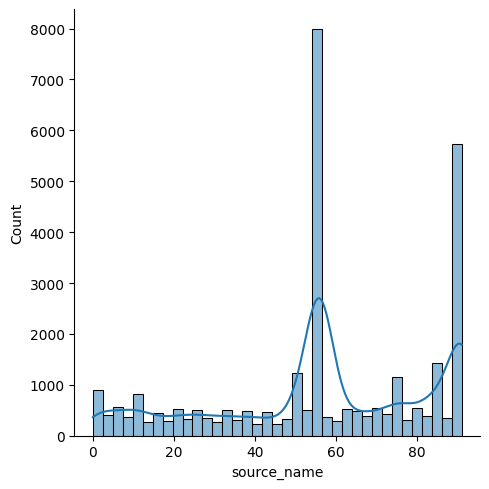

In [30]:
sns.displot(covid,x="source_name",kde=True)

## Test the model and show the metrics

In [28]:
score=cross_val_score(reg_xgb,x_train,y_train,cv=10)
print("mean cross_val score : %.2f"% score.mean())

mean cross_val score : 1.00


In [30]:
reg_xgb.fit(x_train,y_train)
prediction=reg_xgb.predict(x_test)

In [31]:
rmse=np.sqrt(mean_squared_error(y_test,prediction))
print("RMSE: %f" % (rmse))

RMSE: 1266797.027489


## Save your final model

In [32]:
covid_set = setup(data = covid, target = 'total_vaccinations',session_id=123)

In [34]:
xgb=create_model('xgboost')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

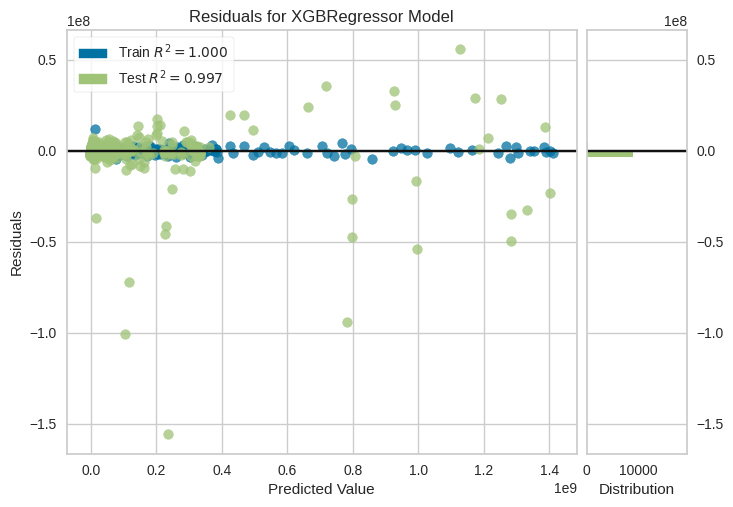

In [35]:
plot_model(xgb)

In [36]:
evaluate_model(xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
save_model(covid,'covid19-vaccine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['country', 'iso_code',
                                              'people_vaccinated',
                                              'people_fully_vaccinated',
                                              'daily_vaccinations_raw',
                                              'daily_vaccinations',
                                              'total_vaccinations_per_hundred',
                                              'people_vaccinated_per_hundred',
                                              'people_fully_vaccinated_per_hundred',
                                              'daily_vaccinations_per_million',
                                              'vaccin...
 1                                12.340698                       35.000000   
 2                                12.340698                       35.000000   
 3                               

## Send us the Result (Maktabkhoone)